In [27]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [28]:
df = pd.read_csv('cleaned2_df.csv')

In [29]:
df.head()

,Unnamed: 0,Property_type,property_sub-type,Price,Post_code,Building_condition,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Swimming_pool,Garden_surface,Garden,Terrace,Provinces
0,0,APARTMENT,PENTHOUSE,476000.0,1130,As new,4.0,156.0,USA hyper equipped,3.0,No,No,0.0,NaN,NaN,Bruxelles
1,3,APARTMENT,PENTHOUSE,399000.0,1200,Good,2.0,105.0,Installed,2.0,No,No,0.0,NaN,NaN,Bruxelles
2,4,APARTMENT,PENTHOUSE,499000.0,1190,As new,2.0,160.0,USA hyper equipped,3.0,No,No,0.0,NaN,NaN,Bruxelles
3,5,APARTMENT,PENTHOUSE,1495000.0,1050,As new,3.0,210.0,USA hyper equipped,4.0,No,No,0.0,NaN,NaN,Bruxelles
4,6,APARTMENT,PENTHOUSE,179000.0,1140,Good,2.0,63.0,Semi equipped,1.0,Yes,No,0.0,NaN,NaN,Bruxelles


In [30]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
#df.drop(['Number_of_frontages'], axis='columns', inplace=True)
#df.drop(['Property_type'], axis='columns', inplace=True)

In [31]:
#Check for all numerical and categorical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of numerical variables: ', len(numerical_features))
print('Number of categorical variables: ', len(categorical_features))

Number of numerical variables:  6
Number of categorical variables:  9


### Dealing with categorical data attributes

In [32]:
#ordered nominal data type

#Check for unique values Building_condition
df['Building_condition'].unique()

#Change categorical data to number
building_condition_map = {'As new': 6, 'Just renovated': 5, 'Good': 4, 'To be done up': 3, 'To renovate':2, 'To restore':1}
df = df.applymap(lambda s: building_condition_map.get(s) if s in building_condition_map else s)

#Fill missing values
df['Building_condition'] = df['Building_condition'].fillna(4)

df['Building_condition'].isnull().sum()

0

In [33]:
#Furnished
df['Furnished'].unique()

df['Furnished'] = df['Furnished'].fillna("No")

df['Furnished'] = pd.Categorical(df['Furnished'], ['No', 'Yes'])
df['Furnished'] = df['Furnished'].cat.codes

In [34]:
#Swimming_pool
df['Swimming_pool'].unique()
df['Swimming_pool'] = pd.Categorical(df['Swimming_pool'], ['No', 'Yes'])
df['Swimming_pool'] = df['Swimming_pool'].cat.codes

In [35]:
#Garden
df['Garden'].unique()
df['Garden'] = df['Garden'].fillna("No")
df['Garden'] = pd.Categorical(df['Garden'], ['No', 'Yes'])
df['Garden'] = df['Garden'].cat.codes

In [36]:
#Terrace
df['Terrace'].unique()

df['Terrace'] = df['Terrace'].fillna("No")

df['Terrace'] = pd.Categorical(df['Terrace'], ['No', 'Yes'])
df['Terrace'] = df['Terrace'].cat.codes

In [37]:
#Property_type
df['Property_type'].unique()
df['Property_type'] = pd.Categorical(df['Property_type'], ['APARTMENT', 'HOUSE'])
df['Property_type'] = df['Property_type'].cat.codes

In [38]:
dummis = pd.get_dummies(df['property_sub-type'], prefix='H')
dummis

,H_APARTMENT_BLOCK,H_BUNGALOW,H_CASTLE,H_CHALET,H_COUNTRY_COTTAGE,H_DUPLEX,H_EXCEPTIONAL_PROPERTY,H_FARMHOUSE,H_FLAT_STUDIO,H_GROUND_FLOOR,...,H_LOFT,H_MANOR_HOUSE,H_MANSION,H_MIXED_USE_BUILDING,H_OTHER_PROPERTY,H_PENTHOUSE,H_SERVICE_FLAT,H_TOWN_HOUSE,H_TRIPLEX,H_VILLA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
property_sub = pd.concat([df, dummis], axis='columns')

In [40]:
final_df = property_sub.drop(['property_sub-type'], axis='columns')
final_df

,Property_type,Price,Post_code,Building_condition,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Swimming_pool,...,H_LOFT,H_MANOR_HOUSE,H_MANSION,H_MIXED_USE_BUILDING,H_OTHER_PROPERTY,H_PENTHOUSE,H_SERVICE_FLAT,H_TOWN_HOUSE,H_TRIPLEX,H_VILLA
0,0,476000.0,1130,6.0,4.0,156.000000,USA hyper equipped,3.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,399000.0,1200,4.0,2.0,105.000000,Installed,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,499000.0,1190,6.0,2.0,160.000000,USA hyper equipped,3.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1495000.0,1050,6.0,3.0,210.000000,USA hyper equipped,4.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,179000.0,1140,4.0,2.0,63.000000,Semi equipped,1.0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12158,0,132000.0,1730,6.0,2.0,239.288809,NaN,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
12159,0,177000.0,1730,6.0,2.0,239.288809,NaN,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
12160,0,190000.0,1730,6.0,2.0,239.288809,NaN,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
12161,0,1350000.0,5600,4.0,2.0,1500.000000,NaN,30.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
final_df.columns

Index(['Property_type', 'Price', 'Post_code', 'Building_condition',
       'Number_of_frontages', 'Living_area', 'Kitchen_type', 'Bedrooms',
       'Furnished', 'Swimming_pool', 'Garden_surface', 'Garden', 'Terrace',
       'Provinces', 'H_APARTMENT_BLOCK', 'H_BUNGALOW', 'H_CASTLE', 'H_CHALET',
       'H_COUNTRY_COTTAGE', 'H_DUPLEX', 'H_EXCEPTIONAL_PROPERTY',
       'H_FARMHOUSE', 'H_FLAT_STUDIO', 'H_GROUND_FLOOR', 'H_KOT', 'H_LOFT',
       'H_MANOR_HOUSE', 'H_MANSION', 'H_MIXED_USE_BUILDING',
       'H_OTHER_PROPERTY', 'H_PENTHOUSE', 'H_SERVICE_FLAT', 'H_TOWN_HOUSE',
       'H_TRIPLEX', 'H_VILLA'],
      dtype='object')

In [42]:
final_df.drop(['Provinces'], axis=1, inplace=True)

In [43]:
final_df = final_df.groupby('Post_code').filter(lambda x : len(x)>30)

P_dummis = pd.get_dummies(final_df['Post_code'], prefix='code')
P_dummis

,code_1000,code_1020,code_1030,code_1040,code_1050,code_1060,code_1070,code_1080,code_1082,code_1090,...,code_8800,code_9000,code_9100,code_9200,code_9300,code_9400,code_9500,code_9600,code_9700,code_9900
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Post_code = pd.concat([final_df, P_dummis], axis='columns')
Post_code

,Property_type,Price,Post_code,Building_condition,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Swimming_pool,...,code_8800,code_9000,code_9100,code_9200,code_9300,code_9400,code_9500,code_9600,code_9700,code_9900
1,0,399000.0,1200,4.0,2.0,105.000000,Installed,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,499000.0,1190,6.0,2.0,160.000000,USA hyper equipped,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1495000.0,1050,6.0,3.0,210.000000,USA hyper equipped,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,179000.0,1140,4.0,2.0,63.000000,Semi equipped,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,255000.0,8370,4.0,2.0,42.000000,Installed,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,0,369000.0,8400,6.0,2.0,55.000000,NaN,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
12155,0,253515.0,3500,4.0,2.0,68.000000,NaN,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
12158,0,132000.0,1730,6.0,2.0,239.288809,NaN,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
12159,0,177000.0,1730,6.0,2.0,239.288809,NaN,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
final2 = Post_code.drop(['Post_code'], axis='columns')
final2

,Property_type,Price,Building_condition,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Swimming_pool,Garden_surface,...,code_8800,code_9000,code_9100,code_9200,code_9300,code_9400,code_9500,code_9600,code_9700,code_9900
1,0,399000.0,4.0,2.0,105.000000,Installed,2.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,499000.0,6.0,2.0,160.000000,USA hyper equipped,3.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1495000.0,6.0,3.0,210.000000,USA hyper equipped,4.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,179000.0,4.0,2.0,63.000000,Semi equipped,1.0,1,0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,255000.0,4.0,2.0,42.000000,Installed,1.0,1,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,0,369000.0,6.0,2.0,55.000000,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12155,0,253515.0,4.0,2.0,68.000000,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12158,0,132000.0,6.0,2.0,239.288809,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12159,0,177000.0,6.0,2.0,239.288809,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Kdummis = pd.get_dummies(final2['Kitchen_type'], prefix='K')
Kdummis

,K_Hyper equipped,K_Installed,K_Not installed,K_Semi equipped,K_USA hyper equipped,K_USA installed,K_USA semi equipped,K_USA uninstalled
1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12152,0,0,0,0,0,0,0,0
12155,0,0,0,0,0,0,0,0
12158,0,0,0,0,0,0,0,0
12159,0,0,0,0,0,0,0,0


In [47]:
Kitchen_type = pd.concat([final2, Kdummis], axis='columns')
Kitchen_type

,Property_type,Price,Building_condition,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Swimming_pool,Garden_surface,...,code_9700,code_9900,K_Hyper equipped,K_Installed,K_Not installed,K_Semi equipped,K_USA hyper equipped,K_USA installed,K_USA semi equipped,K_USA uninstalled
1,0,399000.0,4.0,2.0,105.000000,Installed,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0,499000.0,6.0,2.0,160.000000,USA hyper equipped,3.0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,1495000.0,6.0,3.0,210.000000,USA hyper equipped,4.0,0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0,179000.0,4.0,2.0,63.000000,Semi equipped,1.0,1,0,0.0,...,0,0,0,0,0,1,0,0,0,0
5,0,255000.0,4.0,2.0,42.000000,Installed,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,0,369000.0,6.0,2.0,55.000000,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12155,0,253515.0,4.0,2.0,68.000000,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12158,0,132000.0,6.0,2.0,239.288809,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12159,0,177000.0,6.0,2.0,239.288809,NaN,1.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
final_merge = Kitchen_type.drop(['Kitchen_type'], axis='columns')
final_merge

,Property_type,Price,Building_condition,Number_of_frontages,Living_area,Bedrooms,Furnished,Swimming_pool,Garden_surface,Garden,...,code_9700,code_9900,K_Hyper equipped,K_Installed,K_Not installed,K_Semi equipped,K_USA hyper equipped,K_USA installed,K_USA semi equipped,K_USA uninstalled
1,0,399000.0,4.0,2.0,105.000000,2.0,0,0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,499000.0,6.0,2.0,160.000000,3.0,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1495000.0,6.0,3.0,210.000000,4.0,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,179000.0,4.0,2.0,63.000000,1.0,1,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,255000.0,4.0,2.0,42.000000,1.0,1,0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,0,369000.0,6.0,2.0,55.000000,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12155,0,253515.0,4.0,2.0,68.000000,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12158,0,132000.0,6.0,2.0,239.288809,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12159,0,177000.0,6.0,2.0,239.288809,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5629 entries, 1 to 12160
Columns: 125 entries, Property_type to K_USA uninstalled
dtypes: float64(6), int8(5), uint8(114)
memory usage: 962.0 KB


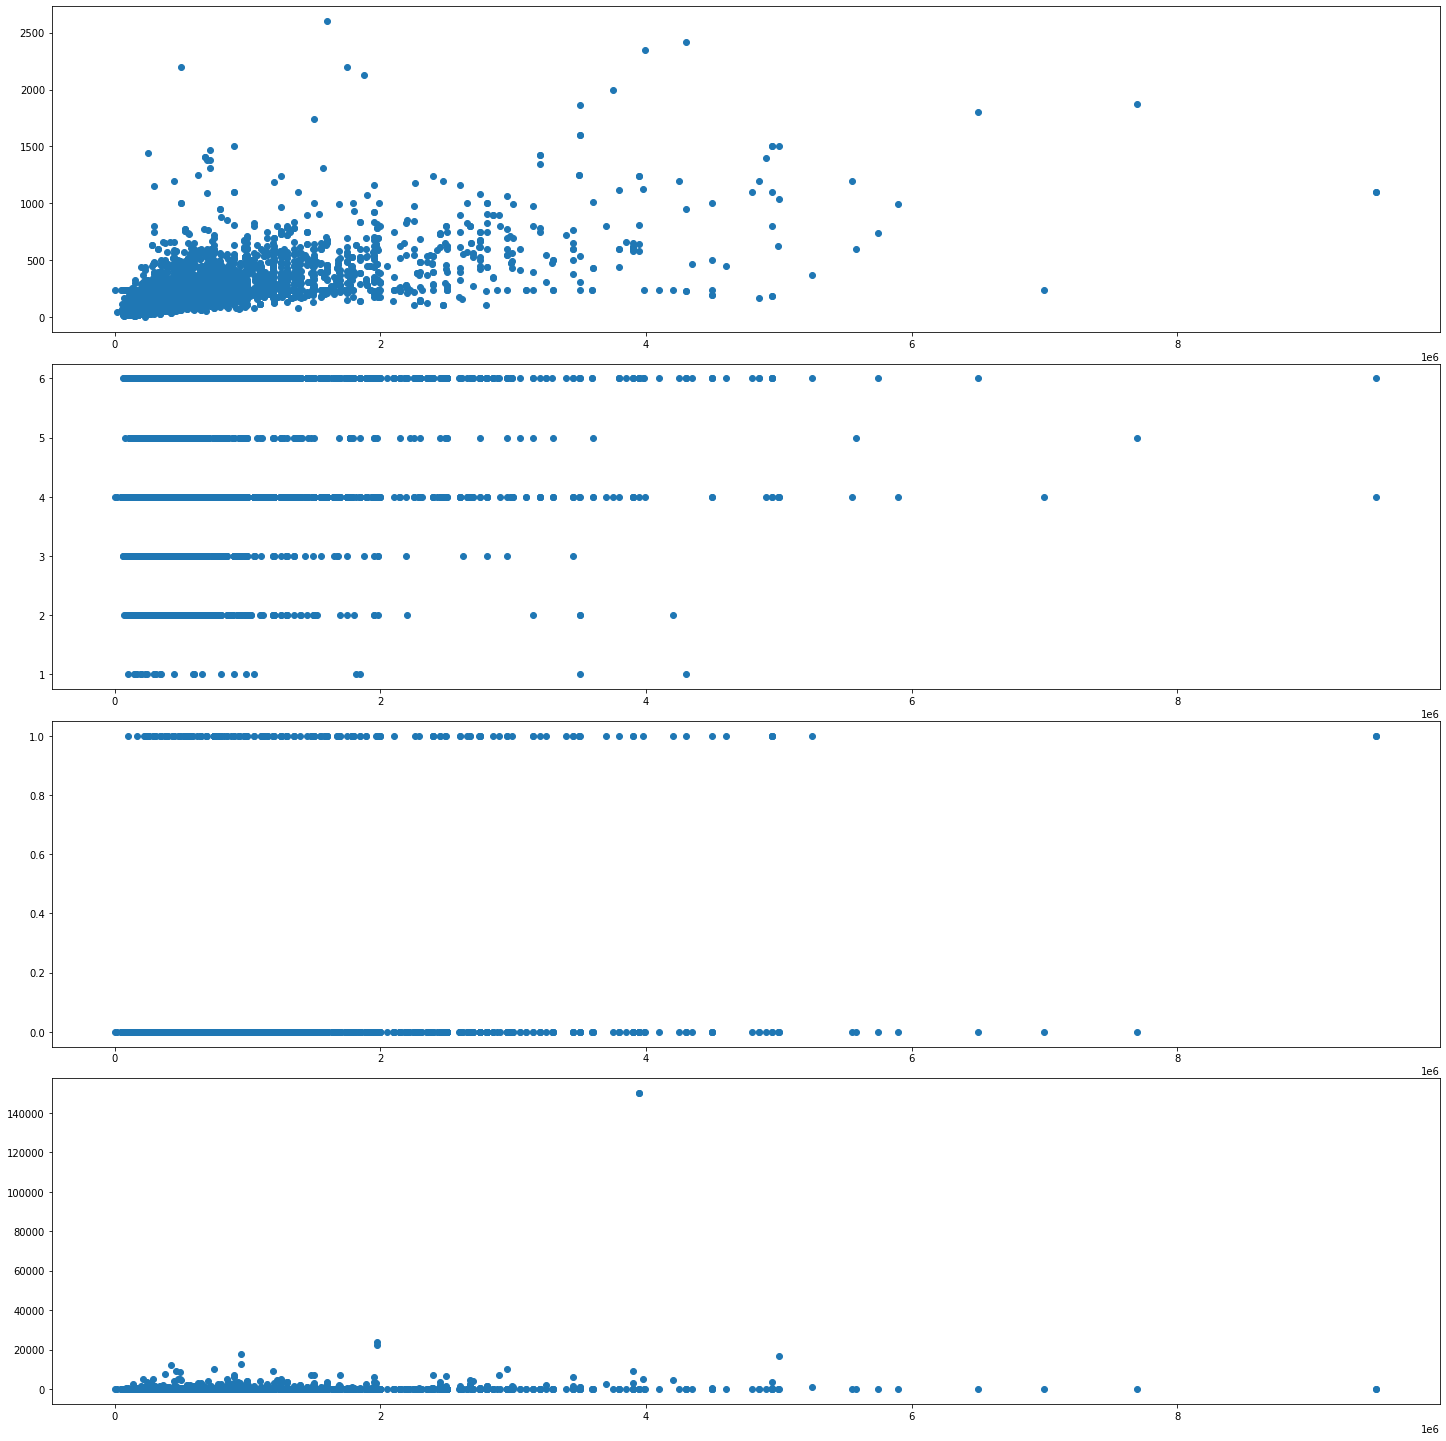

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=[20,20])
axes = axes.flatten()
plt.tight_layout()
axes[0].scatter(final_merge['Price'], final_merge['Living_area'])
axes[1].scatter(final_merge['Price'], final_merge['Building_condition'])
axes[2].scatter(final_merge['Price'], final_merge['Swimming_pool'])
axes[3].scatter(final_merge['Price'], final_merge['Garden_surface'])

In [53]:
#handling outliers
df_capped = final_merge[final_merge['Price']  < 5000000]
df_capped = final_merge[final_merge['Price'] > 50000]
df_capped = final_merge[final_merge['Living_area'] < 1000]
df_capped = final_merge[final_merge['Bedrooms'] < 15]
df_capped

,Property_type,Price,Building_condition,Number_of_frontages,Living_area,Bedrooms,Furnished,Swimming_pool,Garden_surface,Garden,...,code_9700,code_9900,K_Hyper equipped,K_Installed,K_Not installed,K_Semi equipped,K_USA hyper equipped,K_USA installed,K_USA semi equipped,K_USA uninstalled
1,0,399000.0,4.0,2.0,105.000000,2.0,0,0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,499000.0,6.0,2.0,160.000000,3.0,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1495000.0,6.0,3.0,210.000000,4.0,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,179000.0,4.0,2.0,63.000000,1.0,1,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,255000.0,4.0,2.0,42.000000,1.0,1,0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12152,0,369000.0,6.0,2.0,55.000000,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12155,0,253515.0,4.0,2.0,68.000000,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12158,0,132000.0,6.0,2.0,239.288809,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
12159,0,177000.0,6.0,2.0,239.288809,1.0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#df_capped.to_csv("./final_clean_df.csv")

In [181]:
X = final_merge.drop(columns=['Price']).to_numpy()
Y = final_merge.Price.to_numpy().reshape(-1, 1)
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (11097, 552)
Y shape: (11097, 1)


In [182]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)

print('X_train shape:', X_train.shape)
print('x_test shape:', x_test.shape)
print('Y_train shape:', Y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (8877, 552)
x_test shape: (2220, 552)
Y_train shape: (8877, 1)
y_test shape: (2220, 1)


In [183]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [184]:
reg.score(X_train, Y_train)

0.5503348621371724

In [185]:
reg.score(x_test, y_test)

0.5540183551460178

In [141]:
reg.predict(X_train)

array([[561750.57106081],
       [337351.09389979],
       [608180.30208033],
       ...,
       [375349.06127601],
       [167158.56773801],
       [194292.83373958]])

In [ ]:
ypred = reg.predict(X_train)
plt.scatter(X_train, ypred, color = "red")
#plt.plot(X_train, ypred, c='green')
plt.title("Salary VS Experience (Training set)")
plt.xlabel("Years of Experience")
plt.xlabel("Salary")